### <div class="alert alert-info">Name: Dnyanai Surkutwar <br>Email: dsurkutwar@scu.edu  <br>Student ID: 00001586576 <br><center>Quiz#3<center></div>

## Importing required libararies

In [99]:
import warnings
warnings.filterwarnings('ignore')
                        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D


## Loading the iris dataset into a dataframe

In [2]:
df_iris = pd.read_csv('iris.csv',encoding='utf-8')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


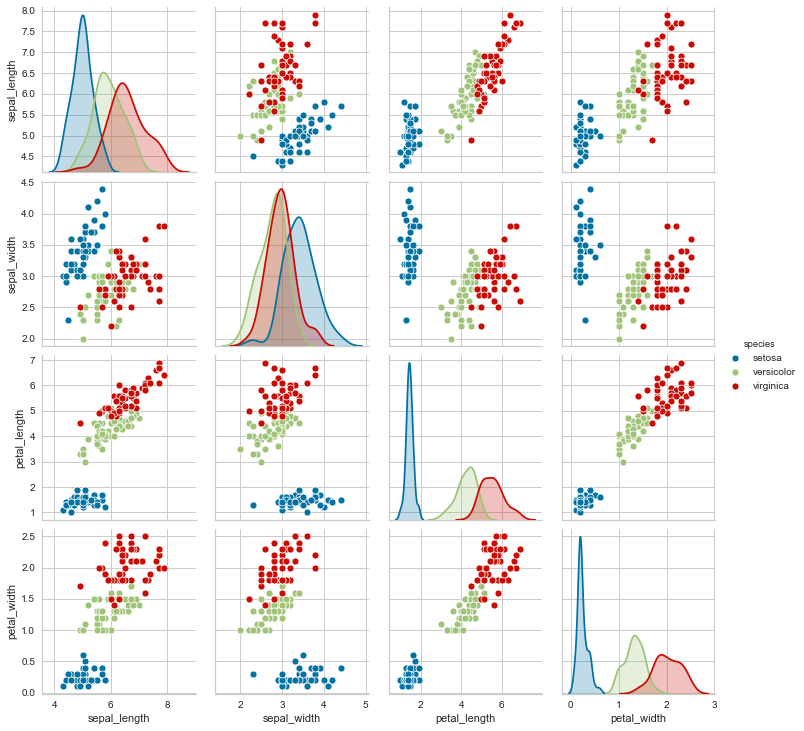

In [136]:
## Lets how the labels of the dataset are in the dataset. 
# We see that versicolor and virginica are very similar in their characteristics
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species");

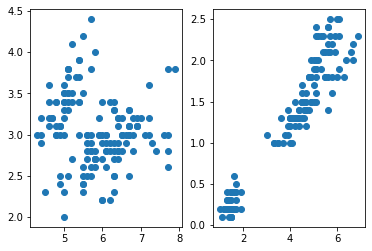

In [3]:
plt.subplot(1,2,1)
plt.scatter(df_iris.sepal_length,df_iris.sepal_width)
plt.subplot(122)
plt.scatter(df_iris.petal_length,df_iris.petal_width)
## We see how the independent columns are related to some extend but for selecting the correct value of k we need to use
## another technique

## We will use two features here for our clustering analysis: 

In [4]:
## X represents the independent variable/s and Y represents the dependent or target variable
X = df_iris.drop(['species'],axis=1).copy()
Y = df_iris.species.copy()

In [5]:
X.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

## Finding out the best number of clusters and implementing the first initialization

In [6]:
## We will use the elbow technique to see how many clusters are formed from our data
score = []

for cluster in range(1,11): ## Checking from 1 cluster upto 11 cluster range
    FindN_model = KMeans(n_clusters = cluster, init="k-means++", random_state=10) ## We are using the default initializer and setting the random generator seed
    FindN_model.fit(X)
    score.append(FindN_model.inertia_)

## Plotting the elbow and silhouette plots to understand the how n=3 gives us correct results

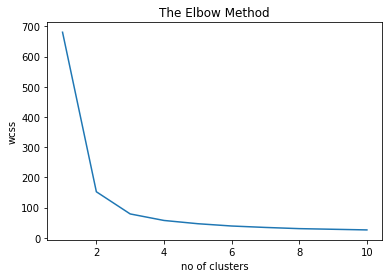

In [7]:
# plotting the score
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss') 
plt.show()
## We already know that we have 3 clusters in our model but it has been proved from the elbow method as well now. 
## wcss -> within cluster sum of squares, we select the number of clusters from where the change in WCSS begins to wear off
## or level off

## Testing for n=5 producing imbalanced silhouette plot results

For n_clusters = 5 The average silhouette_score is : 0.4885175508886279


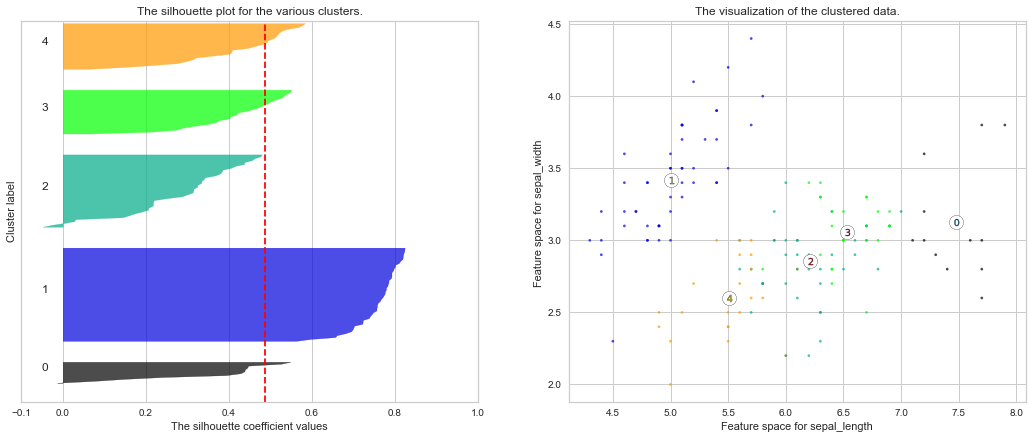

In [8]:
 ##Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Lets see what the output looks like with a wrong number of clusters, here we see that for a 5 cluster dataset label 0 
## seems to have the highest width and the other label scores have dropped a lot, some even having a negative score      
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + 50])


# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
model_5 = KMeans(n_clusters=5,random_state=100,max_iter=300)
cluster_labels = model_5.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", 5,\
      "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)


y_lower = 10
for i in range(5):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / 5)
ax2.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, marker='.', s=30, lw=0, alpha=0.7,
c=colors, edgecolor='k')

# Labeling the clusters
centers = model_5.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for sepal_length")
ax2.set_ylabel("Feature space for sepal_width ")

plt.show()

### <font color='salmon'><li>Above, I have set the number of clusters to 5 which is incorrect as we know the number of clusters present is 3.<br><li>As we can see from the silhoutte plot the clusters are not uniformly distributed and cluster 2 is not equal to the average coefficient score either.<br><li>We also observe that the clusters 4,2 and 3 are overlapping because of which there are some negative values on the silhouette plot.</font> 

## 1 sample run: 

For n_clusters = 3 The average silhouette_score is : 0.5176245501922913


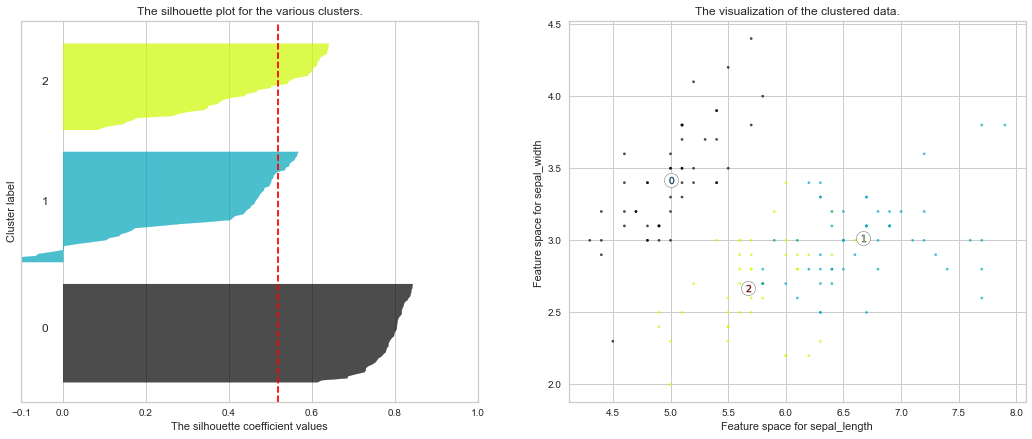

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + 4 * 10])


# Initialize the model for the 1st sample run with random_state=100,n_init=1,max_iter=1,tol=0.00
model_1 = KMeans(n_clusters=3,random_state=80,n_init=1,max_iter=1,tol=0.00)
cluster_labels = model_1.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", 3,\
      "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)


y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
ax2.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, marker='.', s=30, lw=0, alpha=0.7,
c=colors, edgecolor='k')

# Labeling the clusters
centers = model_1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for sepal_length")
ax2.set_ylabel("Feature space for sepal_width ")

plt.show()

### <font color='salmon'><li>For 1 sample run, we observe that our silhoutte coefficient is fair but not perfectly distributed for each of the three clusters.<br><li>As correctly noted in the plot, cluster 1 and cluster 2 are not too far apart from each other and the negative coefficient value for cluster 1 indicates that some of the sample points are overlapping with cluster 2.<br><li>The model's maximum iterations (max_iter) and initialisation(n_init) are set to 1 to run the model only once. 

In [10]:
## The centers of the 1st run 
centers_1 = model_1.cluster_centers_
centers_1

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.590625  , 2.96875   , 5.3734375 , 1.9078125 ],
       [5.67777778, 2.7       , 4.075     , 1.26388889]])

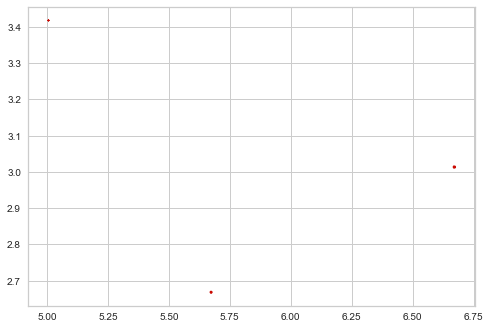

In [33]:
centers_1 = np.array(model_1.cluster_centers_)

plt.scatter(centers_1[:,0], centers_1[:,1],centers_1[:,2], marker="x", color='r')
## Plotting the centres for the 1st run model 

## Plotting the 3 features from our dataset:

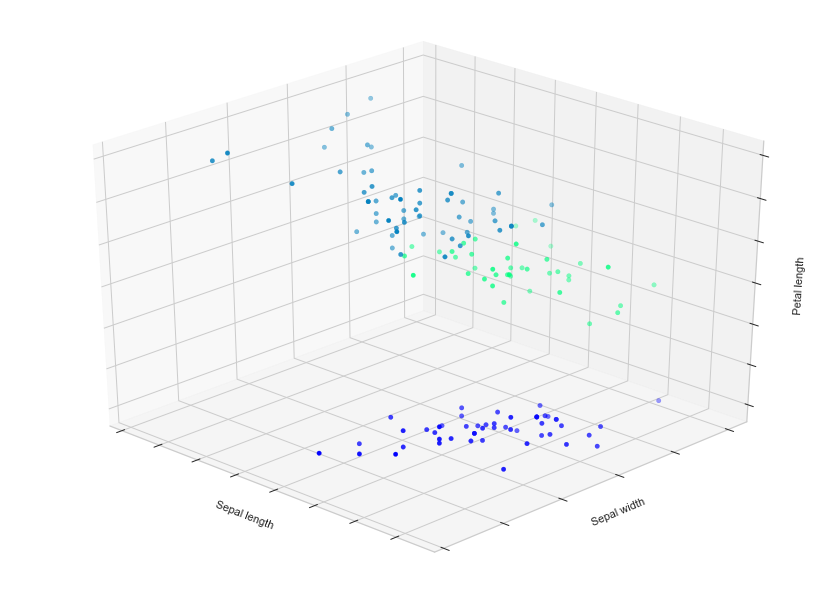

In [12]:
## Now since we got our required no. of clusters lets implement our K-means model, we already have our independent and
## dependent variables. K-means is a unsupervised model so we do not need to divide the data into training and testing.
## reference: https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data

## Plotting the clusters with their respective labels, since its a 3D model we can plot only 3 features
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, rect=[0, 0, .95,1], elev=30, azim=134)
labels = model_1.labels_
img = ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=labels.astype(np.float),cmap=plt.cm.winter)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

plt.show()

In [34]:
## We are creating a new dataframe to map our cluster labels
df_1SampleRun = pd.DataFrame(Y).copy()
df_1SampleRun['cluster_labels'] = model_1.labels_
df_1SampleRun

,species,cluster_labels
0,setosa,0
1,setosa,0
2,setosa,0
3,setosa,0
4,setosa,0
...,...,...
145,virginica,1
146,virginica,1
147,virginica,1
148,virginica,1


In [35]:
df_1SampleRun.groupby('species')['cluster_labels'].value_counts() ## Understanding which label is labelled according to 
## the ground labels

species     cluster_labels
setosa      0                 50
versicolor  2                 39
            1                 11
virginica   1                 45
            2                  5
Name: cluster_labels, dtype: int64

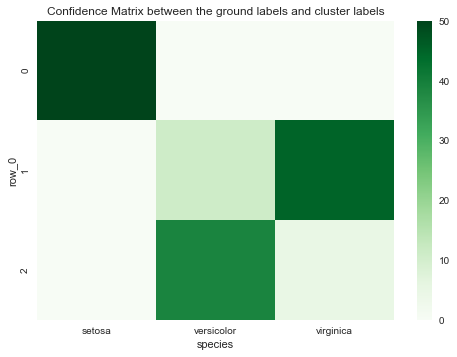

species  setosa  versicolor  virginica
row_0                                 
0            50           0          0
1             0          11         45
2             0          39          5


In [44]:
ConfidenceMatrix = pd.crosstab(model_1.labels_,df_1SampleRun.species)
ax=plt.axes()
sns.heatmap(data=ConfidenceMatrix,ax=ax,cmap="Greens") ## This confi
ax.set_title('Confidence Matrix between the ground labels and cluster labels')
plt.show()
print(ConfidenceMatrix)

### <font color=salmon><li>We see above that the labels from the cluster labels are fairly similar to ground labels except for cluster 1 and cluster 2. Based on which cluster have maximum number of values from ground labels associated with it, we choose the cluster label.

## Converting the cluster labels to the categorical labels from the ground truth 

In [19]:
df_1SampleRun.cluster_labels = df_1SampleRun.cluster_labels.astype('str')
df_1SampleRun['cluster_labels'].loc[df_1SampleRun.cluster_labels=='0'] = 'setosa'
df_1SampleRun['cluster_labels'].loc[df_1SampleRun.cluster_labels=='2'] = 'versicolor'
df_1SampleRun['cluster_labels'].loc[df_1SampleRun.cluster_labels=='1'] = 'virginica'
df_1SampleRun

,species,cluster_labels
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,setosa,setosa
4,setosa,setosa
...,...,...
145,virginica,virginica
146,virginica,virginica
147,virginica,virginica
148,virginica,virginica


## Getting the accuracy of the model:

In [20]:
print('The accuracy of the Kmeans model with 3 clusters:',round(metrics.accuracy_score(Y,df_1SampleRun.cluster_labels),2))

The accuracy of the Kmeans model with 3 clusters: 0.91


### <font color=salmon><li>Unlike classification model, measuring the true postives and true negatives of a clustering model does not make sense.<br><li> This method of accuracy calculations is purely based on the value of the clusters and is more of an absolute comparision which doesnt really reflect the clustering model's details  

In [21]:
metrics.adjusted_rand_score(Y,model_1.labels_)

0.7576057289555466

In [53]:
print(metrics.cluster.contingency_matrix(Y,model_1.labels_))

[[50  0  0]
 [ 0 11 39]
 [ 0 45  5]]


In [22]:
print('homogeneity_score',metrics.homogeneity_score(Y,model_1.labels_))
print('completeness_score',metrics.completeness_score(Y,model_1.labels_))
print('V_measure_score',metrics.v_measure_score(Y,model_1.labels_))
print('FM_score',metrics.fowlkes_mallows_score(Y,model_1.labels_))

homogeneity_score 0.7696199375780861
completeness_score 0.7791400600076823
V_measure_score 0.7743507390201576
FM_score 0.8384647991144092


### <font color=salmon><li>Above, The adjusted Rand Index score tells us more about the similarity of the clusters with the ground cluster labels and is okay as the cluster labels are around 75% similar to the ground labels.<br><li>TheHomogeneity, completeness and V-measure scores give the measure of how te data points in the clusters are belonging to the same cluster labels, how all the data points who are same belong entirely to 1 cluster itself and is the harmonic mean of homogeneity and completeness scores, respectively.<br><li>The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall which is around 83%, seems good but not great! </font>    

## Final clustering run

For n_clusters = 3 The average silhouette_score is : 0.5525919445499757


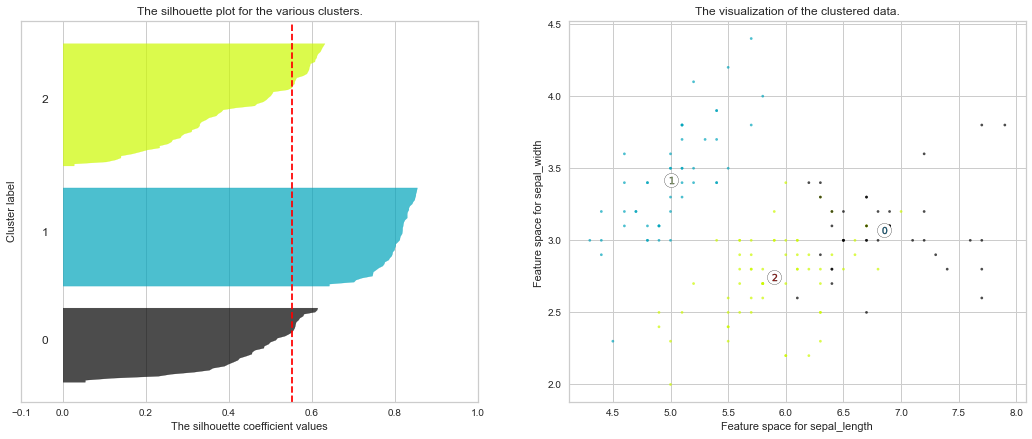

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + 4 * 10])


# Initialize the model for the 1st sample run with random_state=100,n_init=1,max_iter=1,tol=0.00
model_final = KMeans(n_clusters=3,random_state=80,n_init=100,max_iter=300,tol=0.04)
cluster_labels = model_final.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", 3,\
      "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)


y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
ax2.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, marker='.', s=30, lw=0, alpha=0.7,
c=colors, edgecolor='k')

# Labeling the clusters
centers = model_final.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for sepal_length")
ax2.set_ylabel("Feature space for sepal_width ")

plt.show()

### <font color=salmon><li>For the final clustering which is the last effort by the model to calculate the centroids and assigns the cluster centroids which have minimum intra cluster data point distance and maximum inter cluster distance.<br><li>We see that the average silhouette coefficient has increased and also the size of the clusters are nicely distributed thus they look almost equal.<br><li> We also do not see any major or impactful overlapping of the clusters thus there is no negative value of the silhouette coefficient scores.   

In [80]:
centers_final = model_final.cluster_centers_
centers_final

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

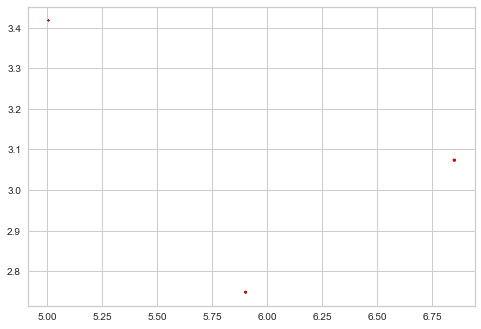

In [81]:
centers = np.array(model_final.cluster_centers_)

plt.scatter(centers[:,0], centers[:,1],centers[:,2], marker="x", color='r')

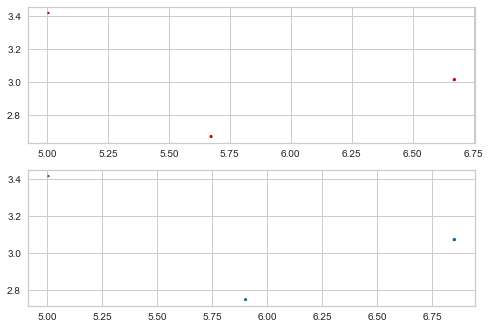

In [82]:
centers_final = np.array(model_final.cluster_centers_)

plt.subplot(2,1,1)
plt.scatter(centers_1[:,0], centers_1[:,1],centers_1[:,2],marker="x", color='r')
plt.subplot(2,1,2)
plt.scatter(centers_final[:,0], centers_final[:,1],centers_final[:,2], marker="x", color='b')

### <font color=salmon> As observed above, we compared the 1st sample run centroids and the final clustering run centroids and we see a change in the centroids location(centres here as we are ploting a 2D graph)

## Plotting a 3D graph for 3 features from our dataset with the final clustering labels:

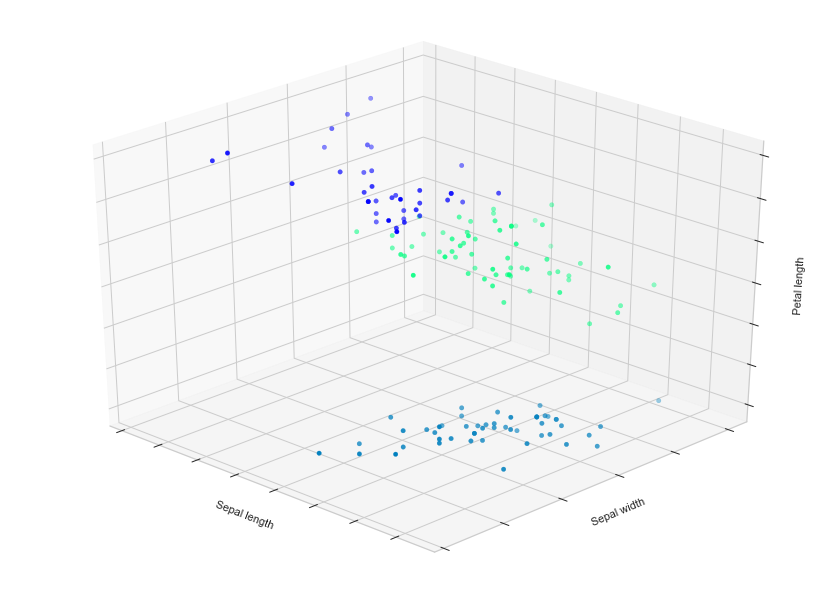

In [83]:
## Now since we got our required no. of clusters lets implement our K-means model, we already have our independent and
## dependent variables. K-means is a unsupervised model so we do not need to divide the data into training and testing.
## reference: https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data

## Plotting the clusters with their respective labels, since its a 3D model we can plot only 3 features
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, rect=[0, 0, .95,1], elev=30, azim=134)
labels = model_final.labels_
img = ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=labels.astype(np.float),cmap=plt.cm.winter)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

plt.show()

## Lets see how accurate our clustering is in comparision to the ground target labels

In [84]:
## We are creating a new column in the df_iris dataframe
df_iris['cluster_labels'] = model_final.labels_ 

In [85]:
Clabels = df_iris.groupby('species')['cluster_labels'].value_counts()
print(Clabels)

species     cluster_labels
setosa      1                 50
versicolor  2                 48
            0                  2
virginica   0                 36
            2                 14
Name: cluster_labels, dtype: int64


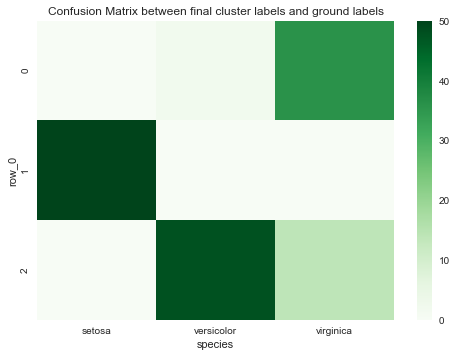

In [86]:
ConfidenceMatrix_f = pd.crosstab(model_final.labels_,df_iris.species)
ax = plt.axes()
sns.heatmap(ConfidenceMatrix_f,cmap="Greens")
ax.set_title('Confusion Matrix between final cluster labels and ground labels')
plt.show()

## Converting the cluster labels to the categorical labels from the ground truth 

In [87]:
df_iris.cluster_labels = df_iris.cluster_labels.astype('str')
df_iris['cluster_labels'].loc[df_iris.cluster_labels=='1'] = 'setosa'
df_iris['cluster_labels'].loc[df_iris.cluster_labels=='2'] = 'versicolor'
df_iris['cluster_labels'].loc[df_iris.cluster_labels=='0'] = 'virginica'
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_labels
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,virginica
146,6.3,2.5,5.0,1.9,virginica,versicolor
147,6.5,3.0,5.2,2.0,virginica,virginica
148,6.2,3.4,5.4,2.3,virginica,virginica


In [88]:
print('The accuracy of the Kmeans model with 3 clusters:',round(metrics.accuracy_score(Y,df_iris.cluster_labels),2))

The accuracy of the Kmeans model with 3 clusters: 0.89


In [89]:
print('The Adjusted Rand Index ',round(metrics.adjusted_rand_score(Y,model_final.labels_),2))

The Adjusted Rand Index  0.73


In [94]:
print(metrics.cluster.contingency_matrix(Y,model_final.labels_))

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


In [90]:
print('homogeneity_score',round(metrics.homogeneity_score(Y,model_final.labels_),2))
print('completeness_score',round(metrics.completeness_score(Y,model_final.labels_),2))
print('V_measure_score',round(metrics.v_measure_score(Y,model_final.labels_),2))
print('FM_score',round(metrics.fowlkes_mallows_score(Y,model_final.labels_),2))

homogeneity_score 0.75
completeness_score 0.76
V_measure_score 0.76
FM_score 0.82


### <font color=salmon><br><li> As observed, the accuacy for the final clustering is a bit degraded as compared to the 1st sample run.<br><li>As per the confunsion matrix, the number of correct cluster labels w.r.t ground labels for versicolor have increased but the virginica label have more wrong labelled data points as compared to the 1st sample run.<br><li> The overall accuracy is decreased as a result by 2-3% and the homogeneity , completeness and V-measure has decreased by 1%.<br><li>The Fowlkes-Mallows index which is based on True positives and negatives in the dataset has also decreased as a result.      

## For 50 iterations: 

In [126]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [97]:
X_50 = X.copy()
X_50

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## We will plot all the 50 iterations with random settings for the KMeans model:

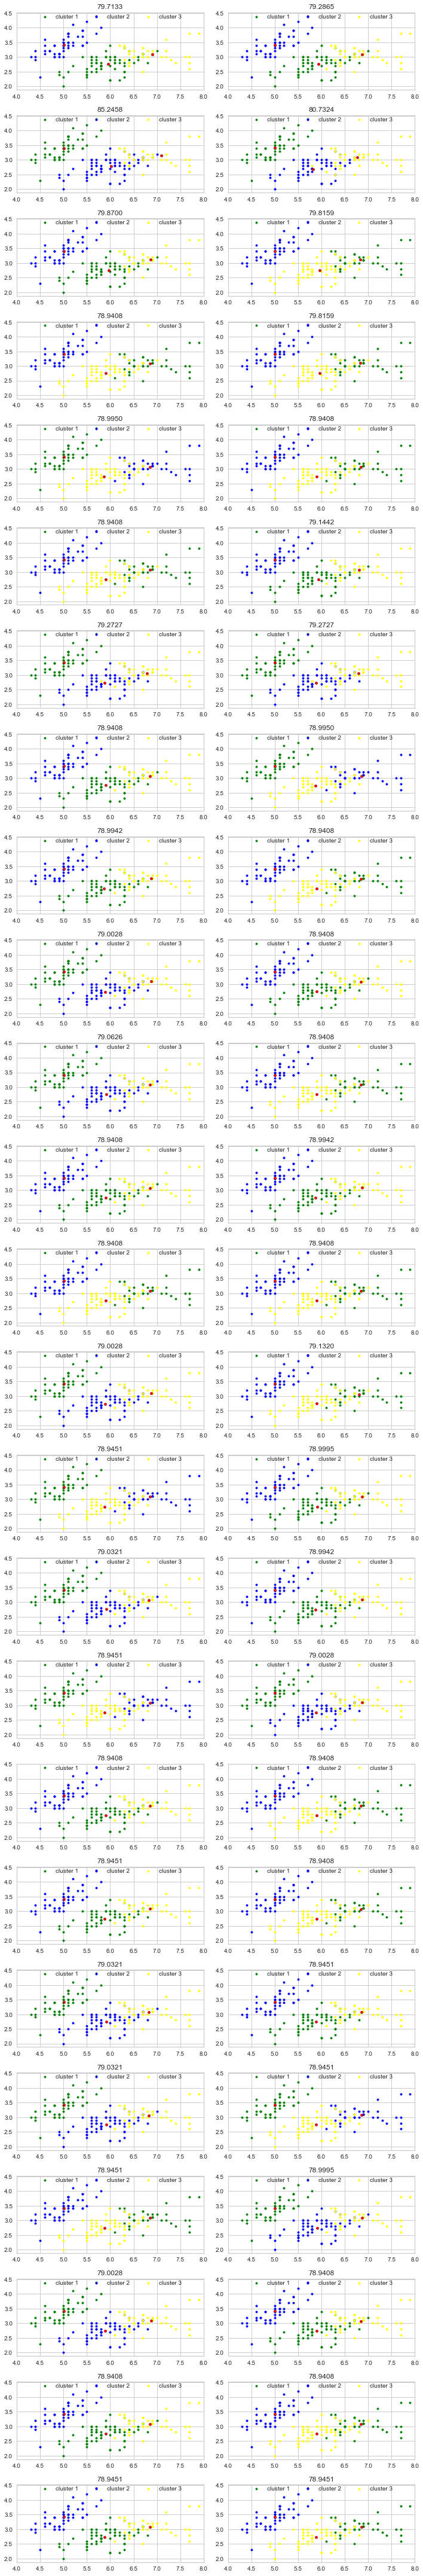

In [100]:
n_iter = 50
fig, ax = plt.subplots(nrows=25,ncols=2)
fig.set_size_inches(10,60)
ax = np.ravel(ax)
centers = []

for i in range(0,n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=3,
                n_init = i+1,
                max_iter = 1,
                random_state=random.randint(1,10), tol=random.uniform(0,0.0001))
    km.fit_predict(X_50)
    centroids = km.cluster_centers_
    centers.append(centroids)
  
    ax[i].scatter(X.iloc[km.labels_ == 0, 0].values,X.iloc[km.labels_ == 0, 1].values, \
                   marker='.',c='green', label='cluster 1')
    ax[i].scatter(X.iloc[km.labels_ == 1, 0], X.iloc[km.labels_ == 1, 1],marker='.', \
                  c='blue', label='cluster 2')
    ax[i].scatter(X.iloc[km.labels_ == 2, 0], X.iloc[km.labels_ == 2, 1],marker='.', \
                  c='yellow', label='cluster 3')

    ax[i].scatter(centroids[:, 0], centroids[:, 1],\
                 marker='o',c="red", alpha=1,s=20, edgecolor='k')

    ax[i].set_xlim([4, 8])
    ax[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
    ax[i].set_title(f'{km.inertia_:.4f}')
    plt.tight_layout();

### <font color=salmon><li>Above the inertia refers to the WCSS which should be minimum for having a better model fit. The inertia are mentioned as the plot titles and the centers are adjusted in every iteration to acheive the minimum distortion. 

In [101]:
NUM_ITER = 50          # n
NUM_ATTEMPTS = 50      # m

centroids =  []
inertias  =  []
accuracies = []

km = KMeans(n_clusters=3,
                n_init = 1,
                max_iter = 1,
                random_state=random.randint(1,10), tol=random.uniform(0,0.0001))
km.fit(X_50)

print('Pre-clustering metrics')
print('----------------------')

print('Inertia:', km.inertia_)
print('Centroids:', km.cluster_centers_)

final_cents = []
final_inert = []

for sample in range(NUM_ATTEMPTS):
    #print('\nCentroid attempt: ', sample)
    km = KMeans(n_clusters=3,
                n_init = sample+1,
                max_iter = 1,
                random_state=random.randint(1,10), tol=random.uniform(0,0.0001))
    km.fit(X_50)
    inertia_start = km.inertia_
    intertia_end = 0
    cents = km.cluster_centers_

for iter in range(NUM_ITER):
    km = KMeans(n_clusters=3,
                n_init = iter+1,
                max_iter = 1,
                random_state=random.randint(1,10), tol=random.uniform(0,0.0001))
    km.fit(X_50)
    print('\nIteration: ', iter)
    
    print('\nInertia:', km.inertia_)
    inertias.append(km.inertia_)
    
    #cm = pd.crosstab(km.labels_,df_iris.species)
    #print('\n',cm)
    
    accu = round(metrics.adjusted_rand_score(Y,km.labels_),4)
    print('The Adjusted Rand Index: ',accu)
    accuracies.append(accu)
    
    print('\nCentroids:', km.cluster_centers_)
    centroids.append(km.cluster_centers_)
    inertia_end = km.inertia_
    cents = km.cluster_centers_

final_cents.append(cents)
final_inert.append(inertia_end)


print('\n\n\nfinal clustering inertia: ', inertia_end)


print('\n\n\nDifference between initial and final inertia: ', inertia_start-inertia_end)


# Get best centroids to use for full clustering
best_cents = final_cents[final_inert.index(min(final_inert))]
print('\n\nThe best/selected centroids are:',best_cents)

Pre-clustering metrics
----------------------
Inertia: 81.50353725036983
Centroids: [[6.675      2.99615385 5.53269231 1.98269231]
 [5.006      3.418      1.464      0.244     ]
 [5.81458333 2.7375     4.22708333 1.34375   ]]

Iteration:  0

Inertia: 79.204003515625
The Adjusted Rand Index:  0.7302

Centroids: [[6.84444444 3.08055556 5.77222222 2.125     ]
 [5.006      3.418      1.464      0.244     ]
 [5.934375   2.7546875  4.41875    1.4234375 ]]

Iteration:  1

Inertia: 79.2865426397778
The Adjusted Rand Index:  0.7302

Centroids: [[5.93230769 2.75538462 4.42923077 1.43846154]
 [5.006      3.418      1.464      0.244     ]
 [6.87428571 3.08857143 5.79142857 2.11714286]]

Iteration:  2

Inertia: 81.54579578710553
The Adjusted Rand Index:  0.8015

Centroids: [[6.66730769 3.03076923 5.51923077 1.99230769]
 [5.006      3.418      1.464      0.244     ]
 [5.82291667 2.7        4.24166667 1.33333333]]

Iteration:  3

Inertia: 82.9589329256554
The Adjusted Rand Index:  0.7862

Centroids: 


Iteration:  36

Inertia: 78.99424615384615
The Adjusted Rand Index:  0.7163

Centroids: [[5.87213115 2.73770492 4.40163934 1.43442623]
 [5.006      3.418      1.464      0.244     ]
 [6.87179487 3.08205128 5.69487179 2.05384615]]

Iteration:  37

Inertia: 78.94084142614602
The Adjusted Rand Index:  0.7302

Centroids: [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]

Iteration:  38

Inertia: 78.94084142614602
The Adjusted Rand Index:  0.7302

Centroids: [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]

Iteration:  39

Inertia: 78.99424615384615
The Adjusted Rand Index:  0.7163

Centroids: [[5.87213115 2.73770492 4.40163934 1.43442623]
 [5.006      3.418      1.464      0.244     ]
 [6.87179487 3.08205128 5.69487179 2.05384615]]

Iteration:  40

Inertia: 79.00283107220376
The Adjusted Rand Index:  0.7163

In [139]:
df_conc = pd.DataFrame(accuracies,inertias)
df_conc = df_conc.reset_index()
df_conc.rename({'index':'inertia',0:'accuracy'},axis=1,inplace=True)

In [114]:
df_conc.corr()

,inertia,accuracy
inertia,1.000000,0.838845
accuracy,0.838845,1.000000


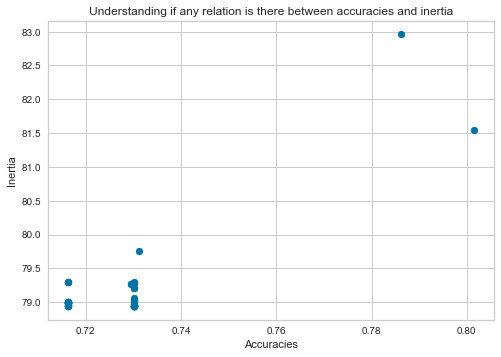

In [110]:
x,y = df_conc.accuracy, df_conc.inertia
ax = plt.axes()
plt.scatter(x,y)
ax.set_title('Understanding if any relation is there between accuracies and inertia')
ax.set_xlabel('Accuracies')
ax.set_ylabel('Inertia')
plt.show()

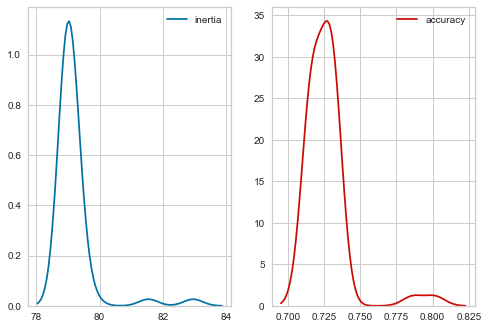

In [138]:
plt.subplot(1,2,1)
sns.kdeplot(y)
plt.subplot(1,2,2)
sns.kdeplot(x,color='r')

### <font color=salmon> We see that the accuracy and inertia of the clusters are directly correlated thus if the inertia increases the accuracy increases. But our aim is always to have minimum inertia which will decrease the accuracy too, that means the Kmeans model has to compromise on either or. To have more accuracy say for example how we saw in the 1st sample run we would have to settle for a more chaotic/inertia value cluster.